# EDA - Metadata Sitios (Google Maps)

En este archivo se realiza el ETL y el EDA de los archivos en el directorio data/raw/google_maps/metadata-sitios.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

# Ignorar advertencias
warnings.filterwarnings('ignore')

In [3]:
# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))

# Agregar la ruta del proyecto al sys.path para traer librerías personalizadas
sys.path.append(project_root)

In [4]:
# importar funciones personalizadas en src/utils
from src.utils.EDA import merge_files, get_frequency

## Extracción de Datos

In [5]:
# se guarda el directorio con los datasets en una variable
data_dir = os.path.join(project_root, 'data/raw/google_maps/metadata-sitios')

# se utiliza la función merge_files para unir los archivos en un solo DataFrame
metadata = merge_files(data_dir)

# Se verifica la estructura del DataFrame
metadata.head(3)

Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\1.parquet
Archivo 1.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\10.parquet
Archivo 10.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\11.parquet
Archivo 11.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\2.parquet
Archivo 2.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\3.parquet
Archivo 3.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\4.p

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.35710,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


## Filtrar Servicios Gastronómicos Vigentes

Se filtran todas las filas que contengan alguna de las palabras clave definidas previamente en una lista.

In [41]:
# se crea una lista con palabras clave de negocios gastronómicos
services = ['restaurant', 'food', 'pub', 'ice cream', 'coffee', 'bakery', 'diner', 'buffet', 'bar', 'brewery']

# se filtran los datos para obtener aquellos que contienen alguno de los servicios gastronómicos
df = metadata[metadata['category'].apply(
    lambda categories: categories is not None and any(
        any(service.lower() in category for service in services) for category in categories
    )
)]

# se muestra longitud del df resultante y se visualizan primeros elementos
print(len(df))
df.head(3)

188106


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"[Bakery, Health food restaurant]",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...","{'Accessibility': None, 'Activities': None, 'A...",Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,None,27.867489,-82.702971,[Buffet restaurant],5.0,2,None,"[[Thursday, 11AM–9PM], [Friday, 11AM–9PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x88c2e5593fbd022b:0x2ccd7a719849c9f7, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...


En la columna 'state' se puede ver que existen valores 'Permanently closed' indicando que dicho negocio ya no está vigente, por lo que se procederá a eliminar las filas correspondientes.

In [42]:
# se filtran las filas de df cuyo dato en state NO sea 'Permanently closed'
df = df[df['state'] != 'Permanently closed']

# se muestra longitud del df resultante y se visualizan primeros elementos
print(len(df))
df.head(3)

146872


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,None,27.389683,-82.508387,"[Mailing service, Courier service, Fax service...",3.4,28,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x88c3475a64b98c03:0xe8de19a19dae1b2c, 0x88c3...",https://www.google.com/maps/place//data=!4m2!3...
126,Onyx Bar,"Onyx Bar, 11011 W Charleston Blvd, Las Vegas, ...",0x80c8be4e73e8263f:0x3edb275a351e6266,None,36.156205,-115.332636,[Cocktail bar],4.7,8,None,"[[Thursday, 4–11PM], [Friday, 4PM–1AM], [Satur...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 4PM,"[0x80c8be531e3b3471:0xb681abb0b8d07596, 0x80c8...",https://www.google.com/maps/place//data=!4m2!3...


## Eliminar Columnas Innecesarias

Las columnas 'description', 'hours', 'state', 'relative_results' y 'url' no aportan ningún valor al proyecto, por lo que se eliminan.

In [43]:
# Eliminar columnas 'description', 'hours', 'state', 'relative_results' y 'url'
df_filtered = df.drop(['description', 'hours', 'state', 'relative_results', 'MISC', 'url'], axis=1).reset_index()

# se verifica estructura del nuevo df
df_filtered.head(3)

,index,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price
0,2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean restaurant],4.4,18,None
1,117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,27.389683,-82.508387,"[Mailing service, Courier service, Fax service...",3.4,28,None
2,126,Onyx Bar,"Onyx Bar, 11011 W Charleston Blvd, Las Vegas, ...",0x80c8be4e73e8263f:0x3edb275a351e6266,36.156205,-115.332636,[Cocktail bar],4.7,8,None


## Exploración de los Datos

### Vista rápida
Se realiza un breve vistazo de los datos.

In [44]:
# se verifica la estructura del dataframe filtrado
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146872 entries, 0 to 146871
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           146872 non-null  int64  
 1   name            146872 non-null  object 
 2   address         145671 non-null  object 
 3   gmap_id         146872 non-null  object 
 4   latitude        146872 non-null  float64
 5   longitude       146872 non-null  float64
 6   category        146872 non-null  object 
 7   avg_rating      146872 non-null  float64
 8   num_of_reviews  146872 non-null  int64  
 9   price           75134 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 11.2+ MB


La columna price tiene demasiados valores nulos imposibles de auditar, por lo que se procederá a eliminarla.

In [45]:
# se elimina la columna price
df_filtered.drop(['price'], axis=1, inplace=True)

In [46]:
# comprensión de variables numéricas
df_filtered.describe()

,index,latitude,longitude,avg_rating,num_of_reviews
count,1.468720e+05,146872.000000,146872.000000,146872.000000,146872.000000
mean,1.378567e+06,37.356045,-92.165640,4.170319,141.062844
std,8.532071e+05,5.395702,17.375727,0.574534,342.648019
min,2.000000e+00,14.158523,-166.552444,1.000000,1.000000
25%,6.682052e+05,33.742051,-102.158091,3.900000,18.000000
50%,1.191066e+06,38.450470,-86.945833,4.300000,53.000000
75%,2.106854e+06,40.995459,-78.195988,4.600000,118.000000
max,3.025007e+06,71.297292,180.000000,5.000000,9998.000000


In [47]:
# visualizar primeras filas
df_filtered.head(3)

,index,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean restaurant],4.4,18
1,117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,27.389683,-82.508387,"[Mailing service, Courier service, Fax service...",3.4,28
2,126,Onyx Bar,"Onyx Bar, 11011 W Charleston Blvd, Las Vegas, ...",0x80c8be4e73e8263f:0x3edb275a351e6266,36.156205,-115.332636,[Cocktail bar],4.7,8


### Comprensión de Variable Categórica

In [48]:
# se crea un df con un explode en la columna category y se visualizan primeros elementos
exploded = df_filtered.explode(column='category')
exploded.head(3)

,index,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18
1,117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,27.389683,-82.508387,Mailing service,3.4,28
1,117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,27.389683,-82.508387,Courier service,3.4,28


In [49]:
# convertir los valores de la columna category a lowercase
exploded['category'] = exploded['category'].str.lower()

In [61]:
# se reesvribe services como expresión regular
services = '|'.join(services)

# mantener solo las categorías que contengan las palabras claves de services y que no me traiga la palabra public
exploded = exploded[
    exploded['category'].str.contains(services, case=False, na=False) & 
    ~exploded['category'].str.contains('public', case=False, na=False)
]

In [62]:
# ver distribución de category 
freq = get_frequency(exploded, 'category')

# ver los tipos de negocios gastronómicos más comunes, su frecuencia y el porcentaje correspondiente
freq.head(20)

,category,frequency,percentage
0,restaurant,31932,10.39
1,fast food restaurant,25045,8.15
2,takeout restaurant,21032,6.84
3,pizza restaurant,18605,6.05
4,mexican restaurant,13285,4.32
5,american restaurant,11828,3.85
6,breakfast restaurant,11222,3.65
7,coffee shop,10610,3.45
8,delivery restaurant,9003,2.93
9,chinese restaurant,8743,2.84


## Visualización

Se visualiza el comportamiento de las variables de forma gráfica.

### Distribución de Categorías

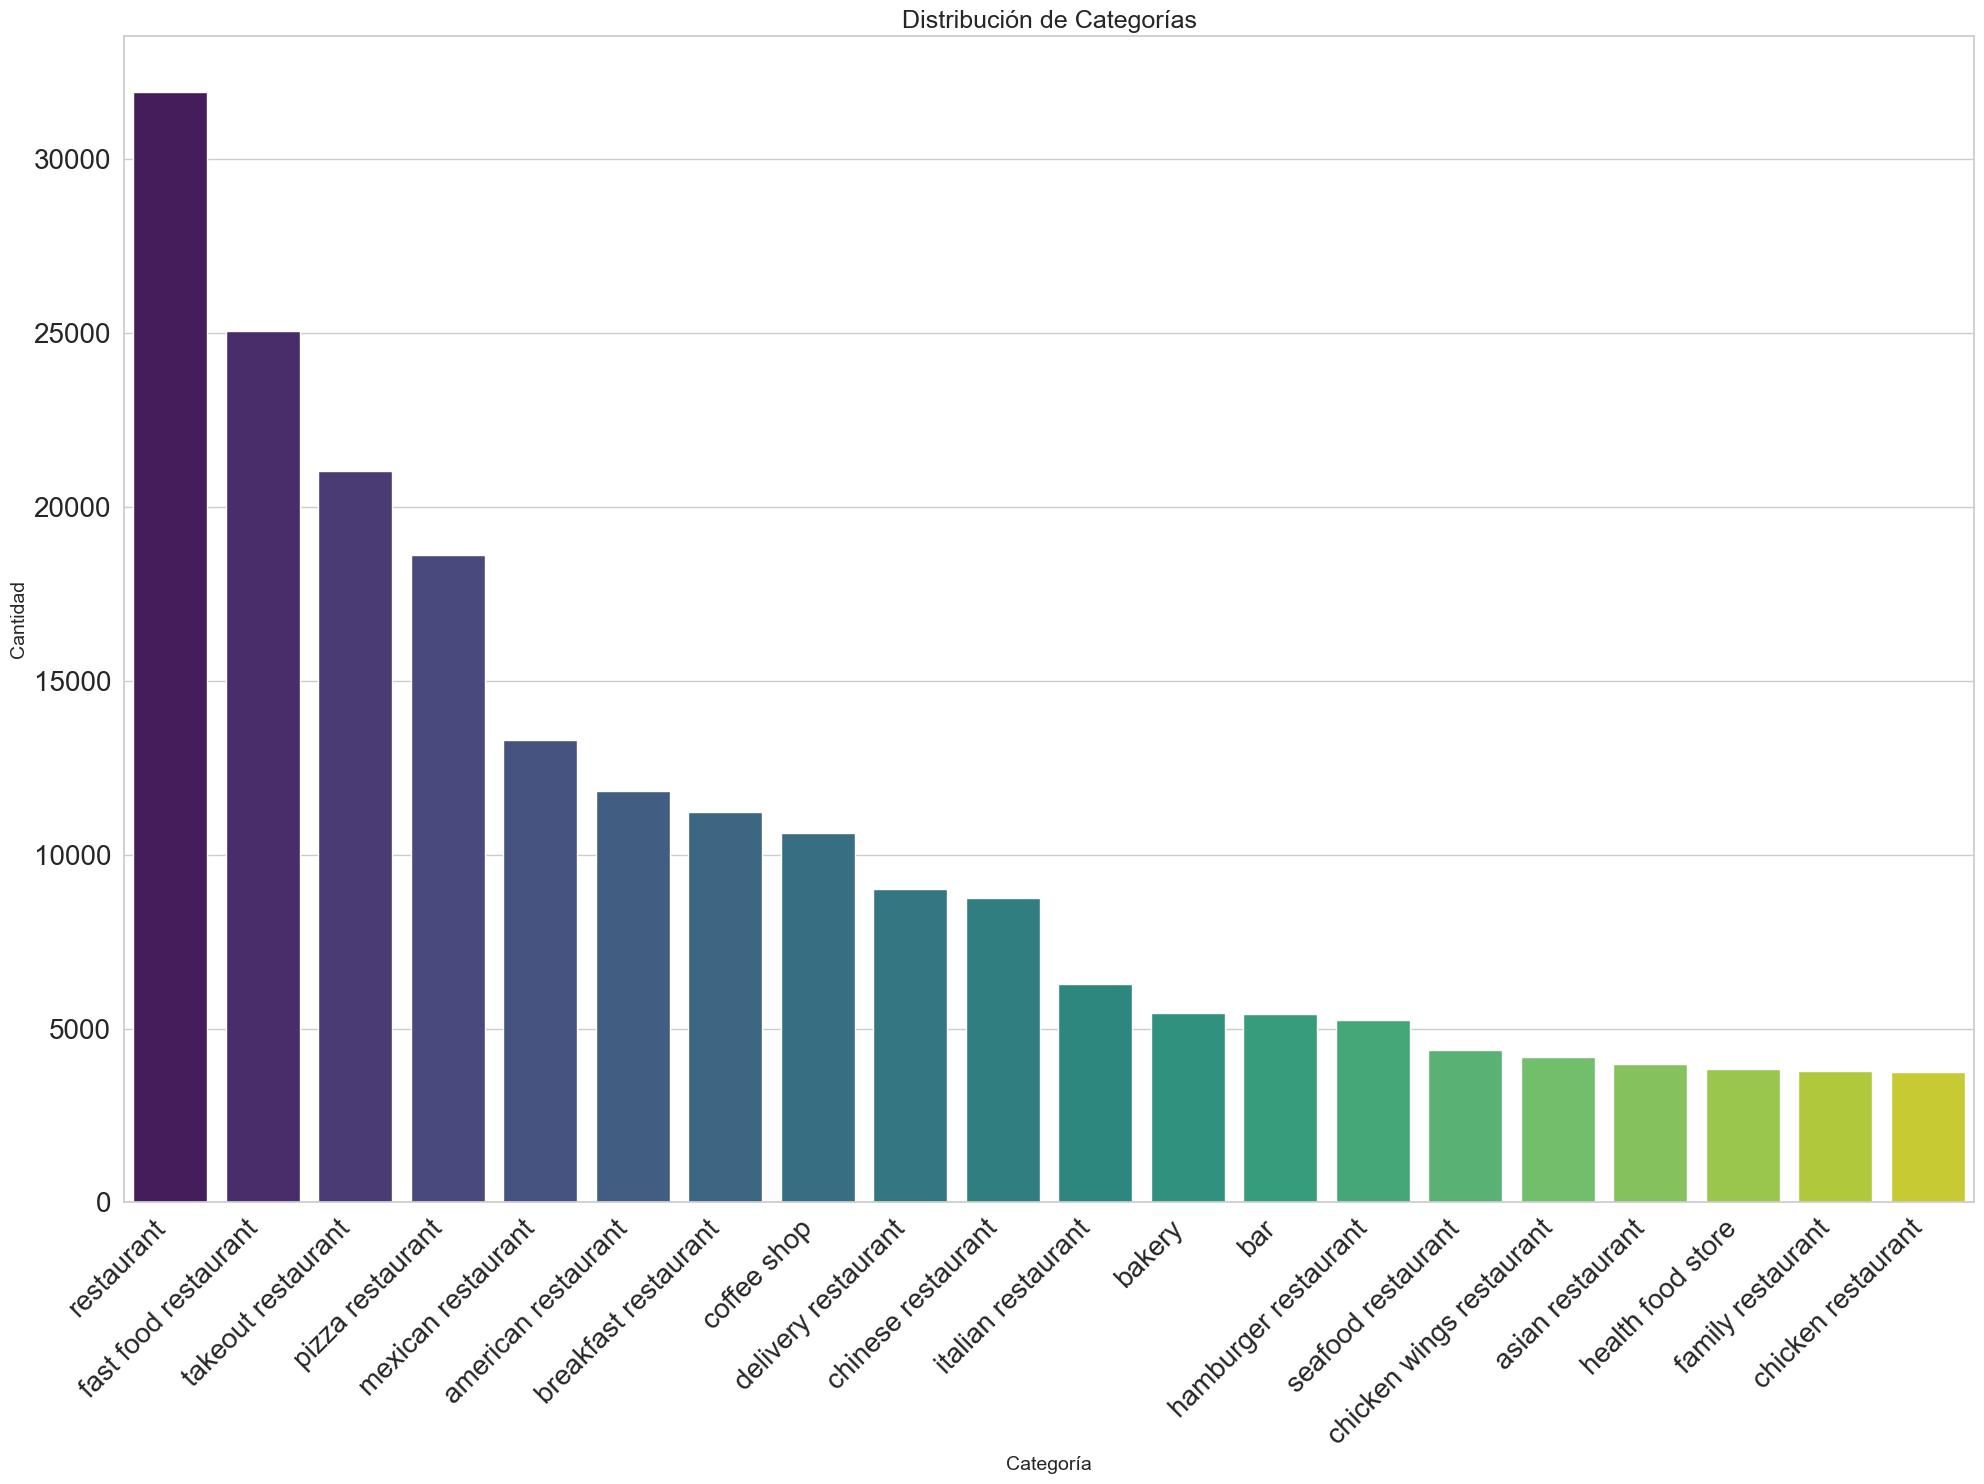

In [70]:
# Gráfico de Barras para ver las categorías más frecuentes
# Configuración del gráfico
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Gráfico de barras con rotación de etiquetas
barplot = sns.barplot(x='category', y='frequency', data=freq.head(20), palette="viridis")
barplot.set_title('Distribución de Categorías', fontsize=18)
barplot.set_xlabel('Categoría', fontsize=14)
barplot.set_ylabel('Cantidad', fontsize=14)

# Rotar etiquetas de las categorías en el eje X
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right", fontsize=20)
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=20)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que los elementos no se sobrepongan
plt.show()

### Calificación Promedio por Categoría

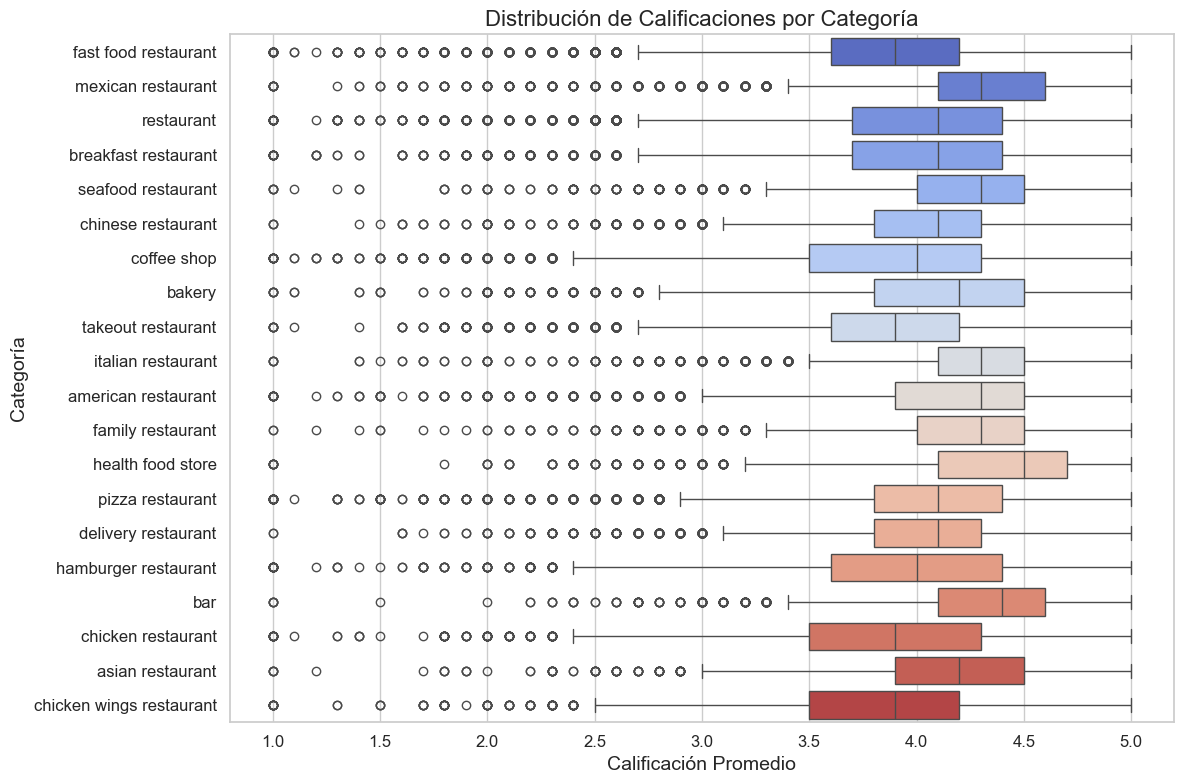

In [71]:
# Filtrar las categorías más frecuentes
top_categories = freq['category'].head(20)  # Ajusta la cantidad de categorías según lo que desees mostrar
filtered_data = exploded[exploded['category'].isin(top_categories)]

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Usar el boxplot con las categorías en el eje Y
boxplot = sns.boxplot(x='avg_rating', y='category', data=filtered_data, palette="coolwarm")
boxplot.set_title('Distribución de Calificaciones por Categoría', fontsize=16)
boxplot.set_xlabel('Calificación Promedio', fontsize=14)
boxplot.set_ylabel('Categoría', fontsize=14)

# Ajustar tamaño de etiquetas
boxplot.tick_params(axis='y', labelsize=12)
boxplot.tick_params(axis='x', labelsize=12)

# Asegurar que el gráfico se ajuste bien al área de la figura
plt.tight_layout()
plt.show()

Puede verse que en las categorías más comunes, que:
- Las calificaciones promedios oscilan entre 2.4 y 5 con menor concentración en valores inferiores.
- Los Italian restaurant y Mexican restaurant tienen una menor variación en las calificaciones.
- Las mayores concentraciones de calificación en estos locales se encuentran entre 3.5 y 4.6.
- Las medias de calificaciones se encuentran entre 3.9 y 4.3, siendo los American restaurant los que poseen la media más alta.
- los Pizza delivery y Pizza Takeout no tienen calificaciones promedio inferiores a 1.4.

### Calificación vs Número de Reseñas

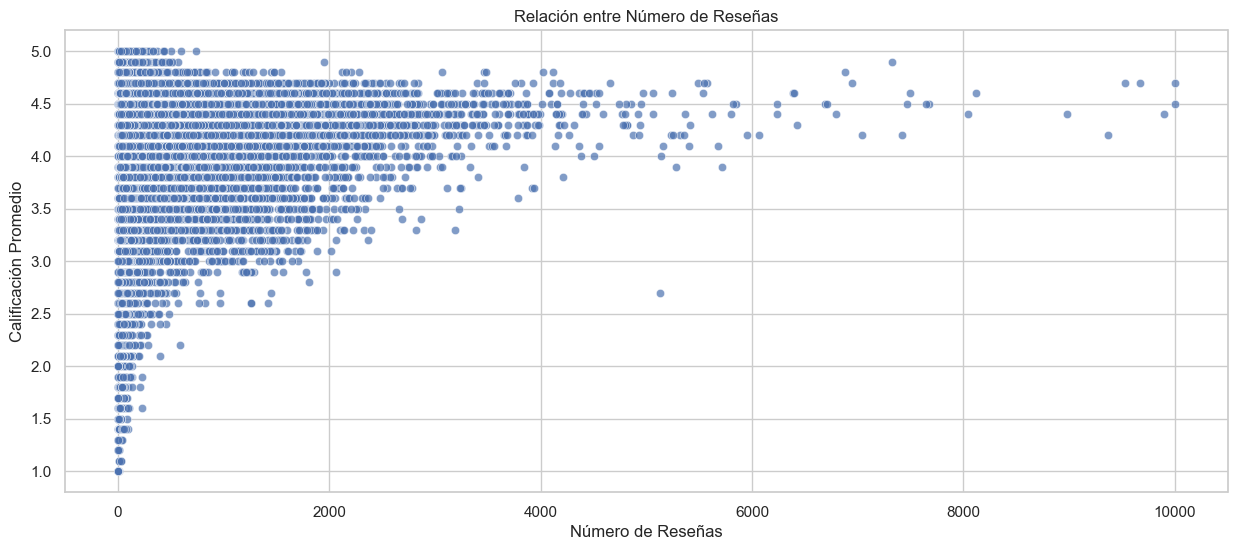

In [39]:
# configuración del diagrama de dispersión
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")

# Gráfico de dispersión con calificación y número de reseñas
sns.scatterplot(x='num_of_reviews', y='avg_rating', data=df_filtered, alpha=0.7)
plt.title('Relación entre Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.show()

- Los locales gastronómicos con una cantidad de reseñas superiores a 4000 tienden a tener calificaciones entre 3.8 y 4.9.
- Los locales con calificación promedio de 5 tienden a tener menos de 1000 reseñas, al igual que los locales con una calificación promedio inferior a 2.5.

## Exportar Dataset Final

In [72]:
# Agrupar por las columnas restantes y volver a contraer `category` en listas
df_final = exploded.groupby(['name', 'address', 'gmap_id','latitude', 'longitude', 'avg_rating', 'num_of_reviews']).agg({'category': list}).reset_index()

df_final.head(3)

,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews,category
0,"""Best Mexican Food in Town""","""Best Mexican Food in Town"", 1130 S State St, ...",0x80816451cb67d913:0xa4553d4f3b03ec7,39.135483,-123.205517,4.3,3,[mexican restaurant]
1,"""Domenica alle Due"" - Robert Anthony's Italian...","""Domenica alle Due"" - Robert Anthony's Italian...",0x89e843ba6e1a9b9d:0x13f13f31d51ae5ce,40.951891,-72.984564,5.0,8,[italian restaurant]
2,"""Elotes Y Nachos"" El Toro","""Elotes Y Nachos"" El Toro, Arlington, TX 76010",0x864e87edad1b6373:0x288178eb4d631ed6,32.718081,-97.079521,4.4,8,[mexican restaurant]


In [ ]:
# exportar dataframe final en formato parquet
df_final.to_parquet('../../data/processed/google_maps/metadata_final.parquet', index=False, compression='gzip')